In [1]:
from PIL import Image
import numpy as np
import os

# Set the root path to the current directory
root_path = '.'  # Assuming the script is running inside the HZDR folder

# OD values for parent folders
od_values = {
    "od1": 1.95E-1,
    "od2": 4.55E-2
}

# Dictionaries to store results: {subfolder_name: adjusted_average_pixel_sum}
adjusted_averages_od1 = {}
adjusted_averages_od2 = {}

# Define the parent folders
parent_folders = ["od1", "od2"]

# Loop through parent folders (od1 and od2)
for parent in parent_folders:
    parent_path = os.path.join(root_path, parent)  # Get the full path of the parent folder

    if not os.path.isdir(parent_path):  # Skip if the parent folder does not exist
        print(f"{parent_path} is not a directory. Skipping.")
        continue

    # Loop through subfolders inside the parent folder
    for subfolder_name in os.listdir(parent_path):
        subfolder_path = os.path.join(parent_path, subfolder_name)  # Full path to the subfolder

        if not os.path.isdir(subfolder_path):  # Skip if not a subfolder
            print(f"{subfolder_path} is not a directory. Skipping.")
            continue

        # Initialize variables for summing pixel values and counting images
        total_pixel_sum = 0
        image_count = 0

        # Loop through all files in the subfolder
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.tiff'):  # Process only TIFF files
                file_path = os.path.join(subfolder_path, file_name)  # Access the image file

                try:
                    # Open the image
                    img = Image.open(file_path)

                    # Convert the image to a NumPy array
                    img_array = np.array(img)

                    # Add the sum of pixel values to the total
                    total_pixel_sum += np.sum(img_array)

                    # Increment the image count
                    image_count += 1
                except Exception as e:
                    print(f"An error occurred while processing {file_name} in {subfolder_path}: {e}")

        # Calculate the average for the subfolder
        average_pixel_sum = total_pixel_sum / image_count if image_count > 0 else 0

        # Adjust the average using the OD value for the parent folder
        od_value = od_values[parent]
        adjusted_average = average_pixel_sum / (10**od_value)

        # Store the adjusted average in the appropriate dictionary
        if parent == "od1":
            adjusted_averages_od1[subfolder_name] = adjusted_average
        elif parent == "od2":
            adjusted_averages_od2[subfolder_name] = adjusted_average

# Print the adjusted averages for folders inside "od1"
print("Adjusted Averages for folders inside 'od1':")
for folder, avg in adjusted_averages_od1.items():
    print(f"Folder: {folder}, Adjusted Average Pixel Sum: {avg:.2f}")

# Print the adjusted averages for folders inside "od2"
print("Adjusted Averages for folders inside 'od2':")
for folder, avg in adjusted_averages_od2.items():
    print(f"Folder: {folder}, Adjusted Average Pixel Sum: {avg:.2f}")

Adjusted Averages for folders inside 'od1':
Folder: 20, Adjusted Average Pixel Sum: 1787683.64
Folder: 23, Adjusted Average Pixel Sum: 887478.57
Folder: 25, Adjusted Average Pixel Sum: 1140965.87
Folder: 26, Adjusted Average Pixel Sum: 2143520.80
Folder: 27, Adjusted Average Pixel Sum: 3273630.44
Folder: 28, Adjusted Average Pixel Sum: 4006994.23
Folder: 29, Adjusted Average Pixel Sum: 2862286.22
Folder: 30, Adjusted Average Pixel Sum: 4846044.56
Adjusted Averages for folders inside 'od2':
Folder: 19, Adjusted Average Pixel Sum: 17037401.78
Folder: 20, Adjusted Average Pixel Sum: 14518472.19
Folder: 23, Adjusted Average Pixel Sum: 7977911.90
Folder: 24, Adjusted Average Pixel Sum: 8374672.22
Folder: 25, Adjusted Average Pixel Sum: 10221575.79


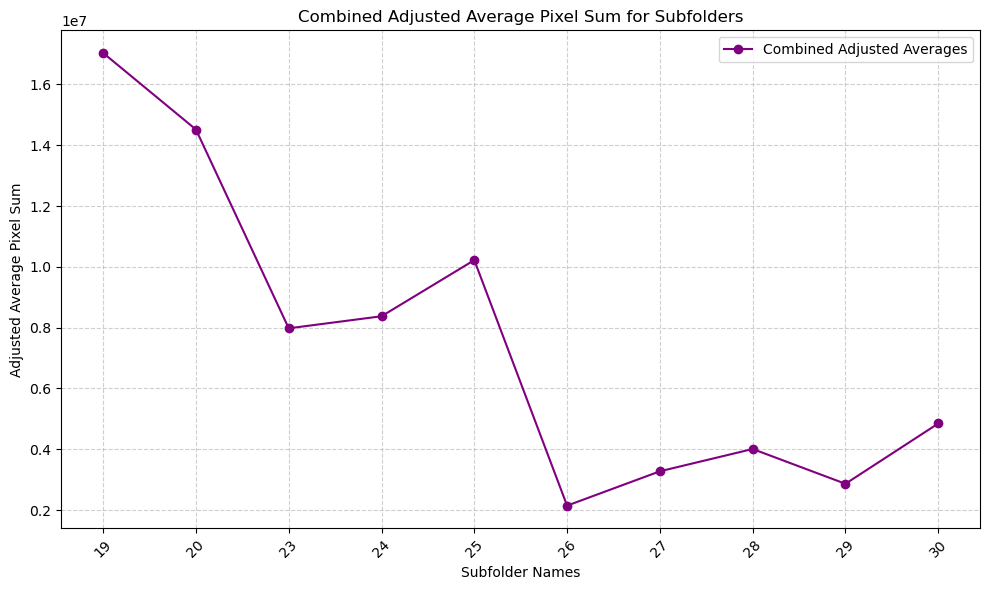

In [2]:
import matplotlib.pyplot as plt

# Combine all key-value pairs into a single dictionary
combined_averages = {**adjusted_averages_od1, **adjusted_averages_od2}

# Sort the combined dictionary by subfolder names (optional, if needed for ordered plotting)
combined_averages = dict(sorted(combined_averages.items()))

# Prepare data for plotting
subfolders_combined = list(combined_averages.keys())  # Combined subfolder names
averages_combined = list(combined_averages.values())  # Combined adjusted averages

# Create a plot
plt.figure(figsize=(10, 6))

# Plot combined curve
plt.plot(
    subfolders_combined, 
    averages_combined, 
    marker='o', 
    color='purple', 
    linestyle='-', 
    label='Combined Adjusted Averages'
)

# Add labels and title
plt.xlabel('Subfolder Names')
plt.ylabel('Adjusted Average Pixel Sum')
plt.title('Combined Adjusted Average Pixel Sum for Subfolders')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()